# **CVPS20 // Brief Introduction to NumPy Arrays and Images**

Sep 10, 2020

---

**Link our Google Drive**

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wGnGYiSTH_phwoEnml2ReafNtSPPrl8bC44rq9ViRcPWbg4EEkHV-4
Mounted at /content/drive


**Import useful modules**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as iio

### Reading in images with `imageio`

Recall the image of NYC that we read in last time:

In [3]:
ls

drive/  sample_data/


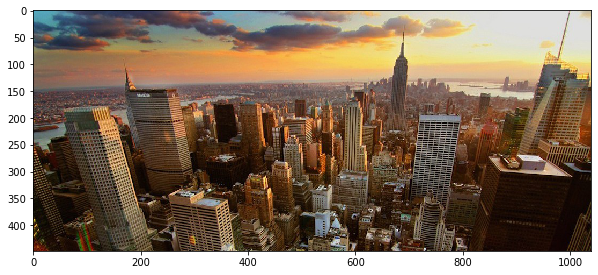

In [7]:
# -- set the filename
fname = '/content/drive/My Drive/cvps20/data/examples/city_image.jpg'

# -- read in the image
img = iio.imread(fname)

fig, ax  = plt.subplots(figsize = (10, 7))
ax.imshow(img, interpolation = 'nearest')

# -- display the image with MPL


Note the type of `img` is an `imageio` array

In [8]:
# -- check the type of img
type(img)


imageio.core.util.Array

which is an `imageio` wrapper around a `numpy` array.  You can convert to this using `numpy`'s `asarray` function

In [9]:
# -- read in the image with iio and convert to numpy array
img = np.asarray(iio.imread(fname))

In [10]:
type(img)

numpy.ndarray

---

### Images as NumPy arrays: Characteristics


There are two characteristics of `numpy` arrays that are important to keep in mind when working with images,

- the shape of the array

- the data type of the array values

Both of these are <u>attributes</u>$^{\dagger}$ of `numpy` arrays.

<small> $^{\dagger}$ all objects in python have "attributes" and "methods".  Methods are functions associated with the object, attributes are values associated with the object.</small>

In [14]:
# -- print the array shape and data types
print("img shape: {0}".format(img.shape))
print("img shape: {0}".format(img.dtype))

img shape: (448, 1040, 3)
img shape: uint8


The **shape** of an image represented as a `numpy` array is

```
  shape = (the number of rows, the number of columns, and the number of "channels")
```

For images that are at visible wavelengths ($\sim 400-700$ nm), these channels are often called "colors" and there are usually 3 – *Red*, *Green*, *Blue* (**RGB**) – for standard point and shoot cameras.

In [16]:
# -- extract the number of rows and columns from the image
nrow, ncol = img.shape[0], img.shape[1]

The data type of `img` is an "unsigned 8-bit integer".  This is not a native data type in python but is a `numpy` data type (`np.uint8`),

- "unsigned" meaning that the number is strictly $\geq 0$
- "8-bit" meaning the possible values are $00000000 = 0$ to $11111111 = 255$

In [17]:
nrow

448

In [18]:
 ncol

1040

In [21]:
1 * 2**0 + 1 * 2**1 + 1 * 2**2 + 1 * 2**3 + 1 * 2**4 + 1 * 2**5 + 1 * 2**6 + 1 * 2**7

255

In [22]:
1 * 2**0 + 0 * 2**1 + 1 * 2**2 + 1 * 2**3 + 1 * 2**4 + 1 * 2**5 + 1 * 2**6 + 1 * 2**7

253

In [19]:
# -- print minimum and maximum values of the array
np.min(img)

0

In [20]:
np.max(img)

255

The "***bit depth***" of a given image is determined by the imaging device with higher values giving increased brightness resolution.

RGB images are also commonly represented as floating point values between $0$ and $1$.

In [23]:
# -- read in the image with iio and convert to numpy array and convert image to 0 to 1 float
img = np.asarray(iio.imread(fname)) / 255.

In [24]:
img
#now all numbers between 0 and 1

array([[[0.31764706, 0.63137255, 0.76862745],
        [0.34117647, 0.65490196, 0.79215686],
        [0.3254902 , 0.63921569, 0.77647059],
        ...,
        [0.78039216, 0.74117647, 0.64313725],
        [0.78039216, 0.74117647, 0.64313725],
        [0.78039216, 0.74117647, 0.64313725]],

       [[0.3254902 , 0.63921569, 0.76862745],
        [0.34901961, 0.6627451 , 0.79215686],
        [0.32941176, 0.64313725, 0.77254902],
        ...,
        [0.78823529, 0.74901961, 0.65098039],
        [0.78431373, 0.74509804, 0.64705882],
        [0.78431373, 0.74117647, 0.65490196]],

       [[0.3254902 , 0.64313725, 0.76078431],
        [0.34901961, 0.66666667, 0.78039216],
        [0.33333333, 0.65098039, 0.76470588],
        ...,
        [0.78823529, 0.74901961, 0.65098039],
        [0.78823529, 0.74901961, 0.65098039],
        [0.78823529, 0.74901961, 0.65098039]],

       ...,

       [[0.45490196, 0.15686275, 0.01568627],
        [0.42745098, 0.1254902 , 0.01568627],
        [0.42352941, 0

NOTE -- for `matplotlib`'s `imshow()` to recognize that an array being displayed is an image, it must have shape $(N_{\rm row}, N_{\rm col}, 3)$ and data type `unit8` with values $0 - 255$ or `float` with values $0 - 1$.

---

### Array creation in 1D and 2D

There are many ways to create arrays in NumPy and some specialized functions for creating certain specialized arrays.

In [25]:
# -- create a numpy array by hand
my_arr = np.array([-10.5, 8.22, 16.7, 33.3, -5.4, 26.1, 101.2, -88.3, 52.6])

In [26]:
# -- create a 1D array of the first 28 integers
ar_arr = np.arange(28)
ar_arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27])

In [28]:
# -- create a 1D array with linear spacing
ls_arr = np.linspace(-10, 5, 4) #min, max, num steps
ls_arr

array([-10.,  -5.,   0.,   5.])

In [30]:
# -- create a 2D array of zeros
ze_arr = np.zeros((5, 10)) #5 row, 10 col
ze_arr

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [32]:
# -- create an array of ones
on_arr = np.ones(12, dtype = int)
on_arr

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [34]:
# -- create a 2D array full of 255
fl_arr = np.full((4, 1), 255, dtype = np.uint8)
fl_arr

array([[255],
       [255],
       [255],
       [255]], dtype=uint8)

In [35]:
# -- create the identity matrix
ey_arr = np.eye(8)
ey_arr

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [38]:
# -- create an array of zeros that has the shape and data type of another array
zl_arr = np.zeros_like(fl_arr)
zl_arr

array([[0],
       [0],
       [0],
       [0]], dtype=uint8)

In [39]:
# -- create a random array
np.random.seed(314)
rarr = np.random.rand(20) #all between 0 and 1
rarr

array([0.91687358, 0.58854191, 0.26504775, 0.78320538, 0.91800106,
       0.82735501, 0.72795148, 0.26048042, 0.9117634 , 0.26075656,
       0.76637602, 0.26153114, 0.12229137, 0.38600554, 0.84008124,
       0.27817936, 0.06991369, 0.63310965, 0.58476603, 0.58123194])

In [42]:
# -- create a random 2D array
np.random.seed(314)
rarr2d = np.random.rand(3, 4)
rarr2d

array([[0.91687358, 0.58854191, 0.26504775, 0.78320538],
       [0.91800106, 0.82735501, 0.72795148, 0.26048042],
       [0.9117634 , 0.26075656, 0.76637602, 0.26153114]])

---

### Slicing Operations and Broadcasting in 2D


Accessing elements of 1D arrays takes two forms:

1. accessing individual elements using brackets plus index number `arr[i]`
2. accessing multiple elements simultaneously using starting index, ending (non-inclusive) index, and "stride" `arr[st:en:sr]`

In [43]:
# -- access individual elements of a 1D array
print(my_arr)
print()
print(my_arr[0])
print()
print(my_arr[4])
print()
print(my_arr[-1])

[-10.5    8.22  16.7   33.3   -5.4   26.1  101.2  -88.3   52.6 ]

-10.5

-5.4

52.6


In [48]:
# -- access pieces of a 1D array by "slicing"
print(my_arr)
print()
print(my_arr[2:5:2])
print()
print(my_arr[3:-2])
print()

[-10.5    8.22  16.7   33.3   -5.4   26.1  101.2  -88.3   52.6 ]

[16.7 -5.4]

[ 33.3  -5.4  26.1 101.2]



Accessing elements of multi-dimensional arrays is identical, except the dimensions are separated by commas.  In 2D:


1. individual elements: `arr[i0, i1]`
2. accessing multiple elements simultaneously: `arr[st0:en0:sr0, st1:en1:sr1]`

In [55]:
rarr2d2 = np.random.rand(5, 3)
rarr2d2

array([[0.68558562, 0.08241767, 0.86816319],
       [0.3409628 , 0.63156595, 0.36937811],
       [0.81176377, 0.38561483, 0.46919063],
       [0.21280682, 0.21244732, 0.31231435],
       [0.53966624, 0.82624344, 0.65711462]])

In [56]:
# -- access individual elements of a 2D array
print(rarr2d)
print()
print(rarr2d[2,1])
print()
print(rarr2d2[2:5, 1:3])

[[0.91687358 0.58854191 0.26504775 0.78320538]
 [0.91800106 0.82735501 0.72795148 0.26048042]
 [0.9117634  0.26075656 0.76637602 0.26153114]]

0.26075655554955113

[[0.38561483 0.46919063]
 [0.21244732 0.31231435]
 [0.82624344 0.65711462]]


In [ ]:
# -- access pieces of a 2D array by slicing
print(rarr2d2[2:5, 1:3])


In [57]:
# -- extract every other element of a 2D array
sub2d = rarr2d[::2, ::2] #step size of 2 for rows, and columns
print(rarr2d)
print()
print(sub2d)

[[0.91687358 0.58854191 0.26504775 0.78320538]
 [0.91800106 0.82735501 0.72795148 0.26048042]
 [0.9117634  0.26075656 0.76637602 0.26153114]]

[[0.91687358 0.26504775]
 [0.9117634  0.76637602]]


In [59]:
sub2d

array([[0.91687358, 0.26504775],
       [0.9117634 , 0.76637602]])

In [60]:
#also changes the array that sub2d was generated from, rarr2d
sub2d[0,1] = 1056
sub2d

array([[9.16873581e-01, 1.05600000e+03],
       [9.11763399e-01, 7.66376023e-01]])

In [61]:
rarr2d

array([[9.16873581e-01, 5.88541914e-01, 1.05600000e+03, 7.83205380e-01],
       [9.18001063e-01, 8.27355012e-01, 7.27951482e-01, 2.60480424e-01],
       [9.11763399e-01, 2.60756556e-01, 7.66376023e-01, 2.61531136e-01]])

---

### Images as NumPy Arrays: Visualizing Values


`imageio` has built in functionality for loading images from the web:

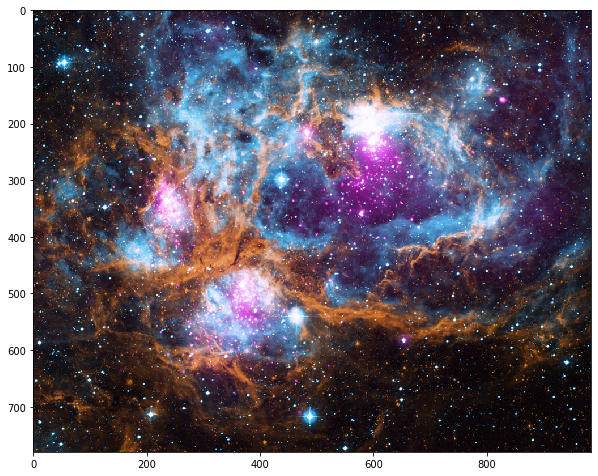

In [63]:
# -- load and display an image
fname = "https://www.nasa.gov/sites/default/files/styles/full_width/public/thumbnails/image/ngc6357_0.jpg"
img = np.asarray(iio.imread(fname))

plt.figure(figsize = (10, 10))
plt.imshow(img, interpolation = 'nearest')


We can use the slicing operations above to access only the Red channel:

In [64]:
img.shape #red, then green, then blue

(780, 985, 3)

In [67]:
# -- access red channel
red = img[:, :, 0] #all rows, all columns, 0th channel

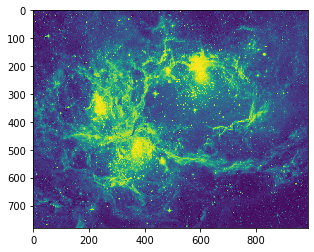

In [71]:
# -- imshow just the red channel
plt.imshow(red, interpolation = 'nearest')

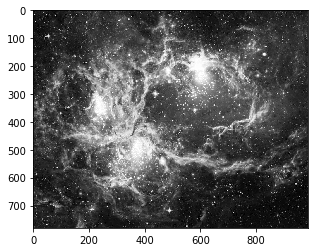

In [69]:
plt.imshow(red, cmap = 'gist_gray', interpolation = 'nearest')

In [70]:
red.shape

(780, 985)

Note, this image has no "color" since it is 2D and only has a one value for each pixel.

Notice that `numpy` arrays have a `transpose` method:

In [72]:
# -- take the transpose of a 2D array
print(sub2d)
print()
print(sub2d.transpose())

[[9.16873581e-01 1.05600000e+03]
 [9.11763399e-01 7.66376023e-01]]

[[9.16873581e-01 9.11763399e-01]
 [1.05600000e+03 7.66376023e-01]]


Notice also, that we've been assigning values to multiple variables from lists (or tuples or arrays) for awhile now:

In [73]:
# -- get the dimensions of the image
print(img.shape[:2])
print()

nrow, ncol = img.shape[:2]

print(nrow, ncol)

(780, 985)

780 985


We can use this with `transpose` to "separate" 3 color images into their individual channels without a lot of typing,

In [74]:
# -- access the red, green, and blue channels separately
red, grn, blu = img.transpose(2, 0, 1) #0th goes to 2nd slot, 1st goes to 0th, 3rd goes to 1st.
#i think

In [ ]:
img.transpose()

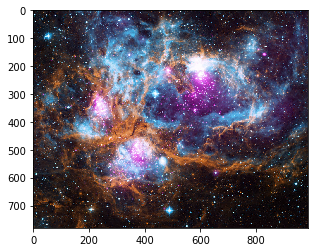

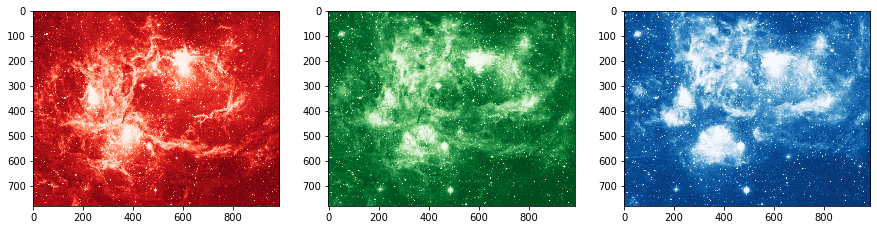

In [80]:
plt.imshow(img, interpolation = 'nearest')
plt.show()

fig, ax = plt.subplots(1, 3, figsize = (15, 7)) #1 row, 3 columns
ax[0].imshow(red, cmap = 'Reds_r', interpolation = 'nearest')
ax[1].imshow(grn, cmap = 'Greens_r', interpolation = 'nearest')
ax[2].imshow(blu, cmap = 'Blues_r', interpolation = 'nearest')

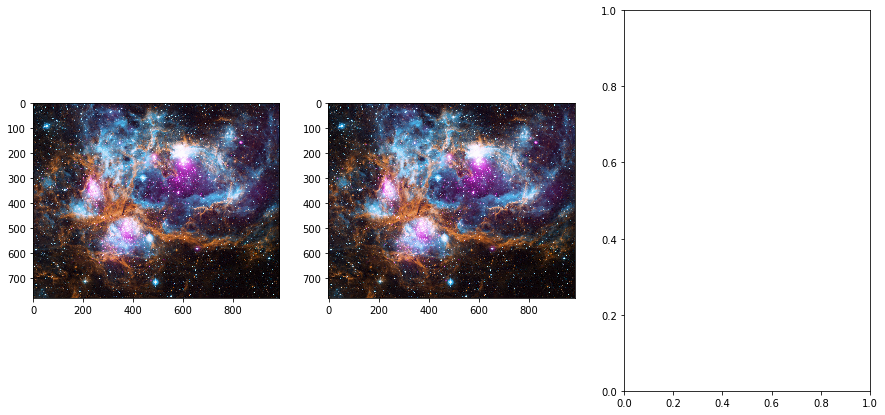

In [83]:
# -- imshow the three channels separately
img_fl = img / 255.0
fig, ax = plt.subplots(1, 3, figsize = (15,7))
ax[0].imshow(img, interpolation = 'nearest')
ax[1].imshow(img_fl, interpolation = 'nearest')
#ax[2].imshow(1.0 * img, interpolation = 'nearest') will bring up error because imshow doesn't understand the data with .

Remember, `matplotlib` only recognizes images as 3-color if they conform to the proper data types and limits

In [ ]:
# -- matplotlib will (properly) display 3 color image if they are of dtype 
#    np.uint8 or if they are of dtype float and between 0 and 1
img_fl = img / 255.0

fig, ax = plt.subplots(1, 3, figsize=(15, 7))


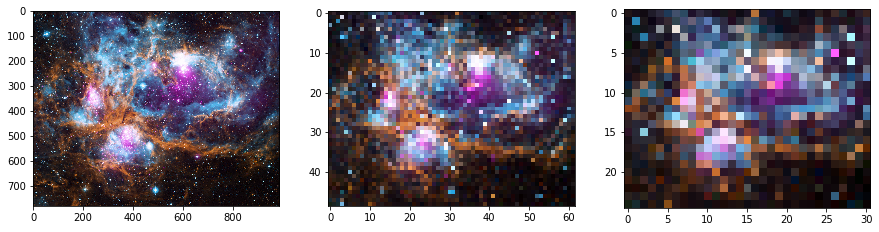

In [86]:
# -- taking every N'th element is equivalent to "sub-sampling"
fig, ax = plt.subplots(1, 3, figsize=(15, 7))
ax[0].imshow(img, interpolation = 'nearest')
ax[1].imshow(img[::16, ::16], interpolation = 'nearest')
ax[2].imshow(img[::32, ::32], interpolation = 'nearest')

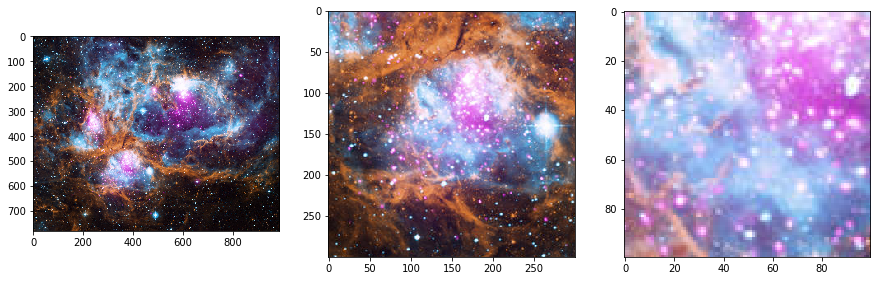

In [87]:
# -- and slicing can give you pieces of the image
fig, ax = plt.subplots(1, 3, figsize=(15, 7))
ax[0].imshow(img, interpolation = 'nearest')
ax[1].imshow(img[400:700, 200:500], interpolation = 'nearest')
ax[2].imshow(img[500:600, 300:400], interpolation = 'nearest')